In [123]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [124]:
movies = pd.read_csv("E:/DataScience/Assignments/Association Rules/my_movies.csv")

In [125]:
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [126]:
movies = movies.dropna(axis=1)

In [127]:
movies

,V1,V2,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,1,1,0,0,0,0,0,1,0,1


In [128]:
movies = pd.get_dummies(movies)

In [129]:
movies 

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
8,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0


In [130]:
movies = movies.drop(["V2_LOTR","V2_LOTR1","V2_LOTR2","V2_Patriot"], axis=1)

In [131]:
movies = movies.drop(["V1_Gladiator","V1_Harry Potter1","V1_LOTR1","V1_Sixth Sense","V2_Harry Potter2"], axis=1)

In [132]:
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [133]:
frequent_itemsets = apriori(movies, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [134]:
movies.mean()

Sixth Sense      0.6
Gladiator        0.7
LOTR1            0.2
Harry Potter1    0.2
Patriot          0.6
LOTR2            0.2
Harry Potter2    0.1
LOTR             0.1
Braveheart       0.1
Green Mile       0.2
dtype: float64

In [135]:
frequent_itemsets = apriori(movies, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [136]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [137]:
rules.drop_duplicates(subset=['lift'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


In [138]:
x = rules.support
y = rules.confidence

Text(0, 0.5, 'confidence')

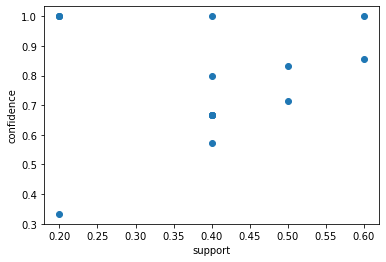

In [140]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('support')
plt.ylabel('confidence')

(array([4., 0., 0., 0., 0., 8., 0., 2., 0., 2.]),
 array([0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 , 0.44, 0.48, 0.52, 0.56, 0.6 ]),
 <a list of 10 Patch objects>)

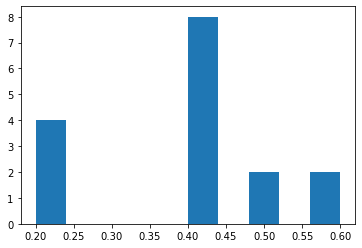

In [141]:
plt.hist(x)

(array([1., 0., 0., 1., 0., 6., 0., 3., 0., 5.]),
 array([0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <a list of 10 Patch objects>)

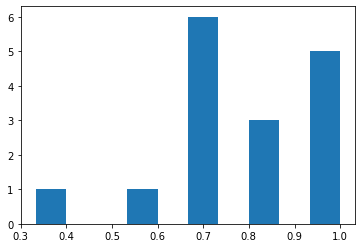

In [142]:
plt.hist(y)

{'whiskers': [<matplotlib.lines.Line2D at 0x2af306ab340>,
 'caps': [<matplotlib.lines.Line2D at 0x2af306aba00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2af3069bfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x2af306b6100>],
 'fliers': [<matplotlib.lines.Line2D at 0x2af306b6400>],
 'means': []}

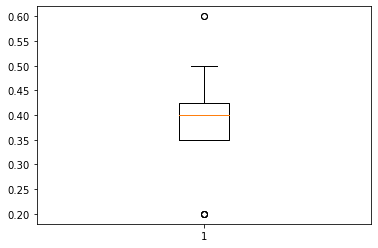

In [143]:
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x2af3070a670>,
 'caps': [<matplotlib.lines.Line2D at 0x2af3070ad30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2af3070a310>],
 'medians': [<matplotlib.lines.Line2D at 0x2af30714460>],
 'fliers': [<matplotlib.lines.Line2D at 0x2af30714760>],
 'means': []}

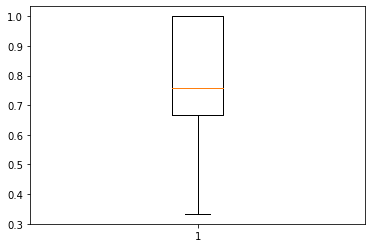

In [144]:
plt.boxplot(y)